In [1]:
#Load the data from train file
import pandas as pd
import numpy as np

def load_mnist_data():
    
    data=pd.read_csv('train.csv', sep=',').as_matrix()
    data.shape
    N = data.shape[0]
    n_train = int((N*70)/100)
    X_train = data[:n_train,1:]
    Y_train = data[:n_train,0]

    X_test = data[n_train:,1:]
    Y_test = data[n_train:,0]

    C = 10
    d = X_train.shape[1]
    return data, N, n_train, X_train, Y_train, X_test, Y_test, C, d

In [2]:
data, N, n_train, X_train, Y_train, X_test, Y_test, C, d = load_mnist_data()

In [20]:
%matplotlib inline

K : 40	 Train Accuracy 77.251701, 	Test Accuracy 76.706349


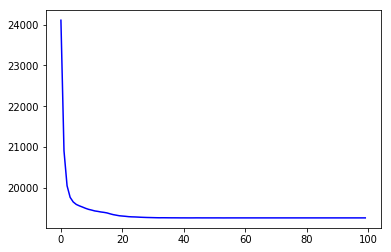

In [131]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def assign_labels_to_centroids(X_train, Y_train, X_means):
    A = np.sum(X_train*X_train, axis=1).reshape(-1,1)
    B = np.sum(X_means*X_means, axis=1).reshape(1,-1)
    C = X_train.dot(X_means.T)
    d = A+B-2*C
    labels = np.argmin(d, axis=0)
    labels = Y_train[labels]
    return labels

def assign_labels(X_train, X_means):
    A = np.sum(X_train*X_train, axis=1).reshape(-1,1)
    B = np.sum(X_means*X_means, axis=1).reshape(1,-1)
    C = X_train.dot(X_means.T)
    d = A+B-2*C
    labels = np.argmin(d, axis=1)
    return labels.T

def compute_mean(X_train, X_labels, K):
    N = X_train.shape[0]
    label_matrix = np.zeros((N,K))
    label_matrix[np.arange(N),X_labels] = 1
    return label_matrix.T.dot(X_train)/np.sum(label_matrix, axis=0).reshape(-1,1)

def compute_error(X_train, X_means, X_labels, K):
    N = X_train.shape[0]
    label_matrix = np.zeros((N,K))
    label_matrix[np.arange(N),X_labels] = 1
    means = label_matrix.dot(X_means)
    error = np.sum(np.sqrt(((X_train-means)*(X_train-means))))/N
    return error

def KMeans(X_train, Y_train, K, iterations):
    N = X_train.shape[0]
    d = X_train.shape[1]
    mu = np.mean(X_train, axis=0)
    sigma = np.std(X_train, axis=0)
    X_means = mu*np.random.randn(K, d)+sigma
    
    X_labels = assign_labels(X_train, X_means)
    it = 0
    errors = []
    while it < iterations:
        X_means = compute_mean(X_train, X_labels, K)
        X_labels = assign_labels(X_train, X_means)
        error = compute_error(X_train, X_means, X_labels, K)
        errors.append(error)
        it += 1
    
    return errors, X_means

K = 40
errors, X_means = KMeans(X_train, Y_train, K, 100)
labels = assign_labels_to_centroids(X_train, Y_train, X_means)
test_labels = labels[assign_labels(X_test, X_means)]
train_labels = labels[assign_labels(X_train, X_means)]

train_accuracy = (np.sum(Y_train == train_labels)/Y_train.shape[0])*100
test_accuracy = (np.sum(Y_test == test_labels)/Y_test.shape[0])*100
print("K : %d\t Train Accuracy %f, \tTest Accuracy %f"%(K, train_accuracy, test_accuracy))
plt.plot(range(len(errors)), errors, 'b-')
plt.show()


3
0
7
1
4
7
2
6
3
4
2
6
8
1
1
5
9
0
4
8


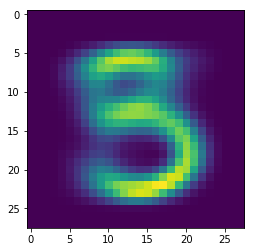

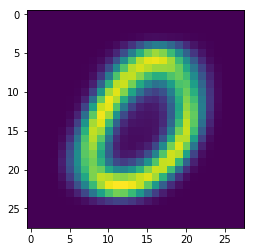

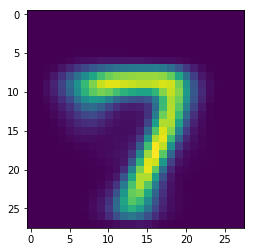

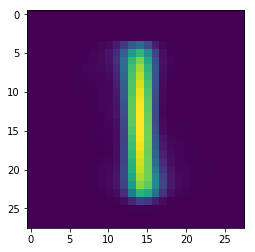

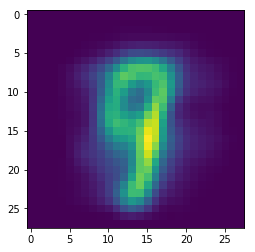

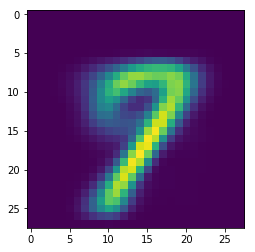

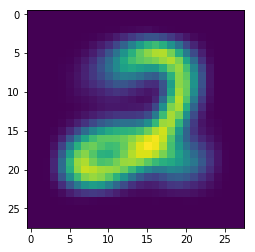

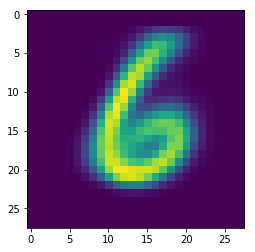

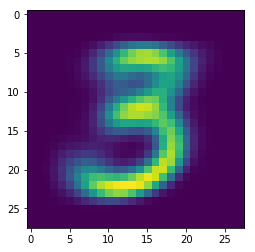

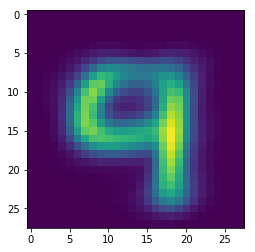

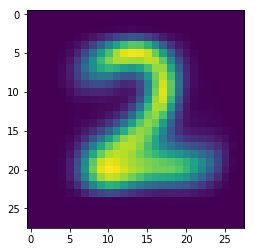

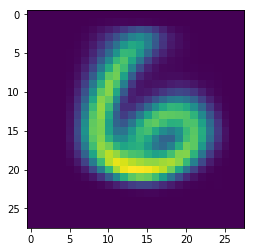

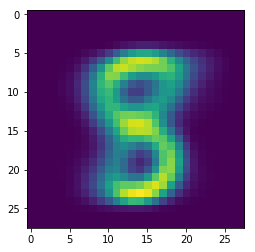

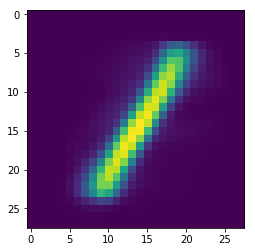

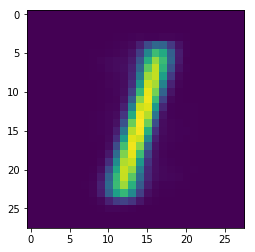

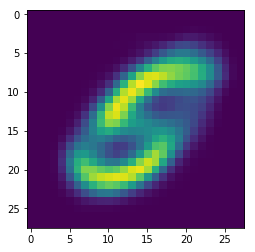

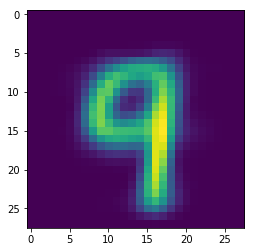

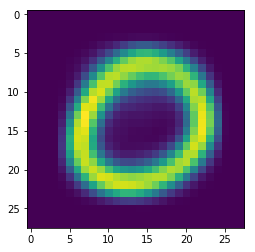

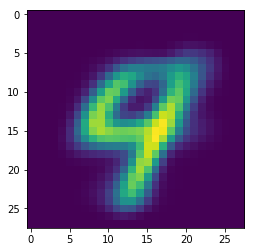

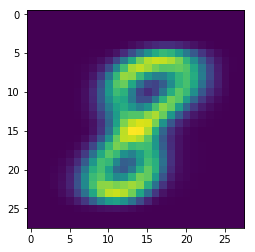

In [115]:
for i in range(K):
    fig = plt.figure()
    print(labels[i])
    plt.imshow(X_means[i].reshape(28,28))

plt.show()